**Описание проекта**

**Заказчик** - развлекательное приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

**Задача** — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

В нашем распоряжении три датасета. 

- visits_info_short.csv - хранит лог сервера с информацией о посещениях сайта, 
- orders_info_short.csv — информация о заказах
- costs_info_short.csv — информацию о расходах на рекламу

Структура visits_info_short.csv:

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
 
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

#### Загрузка данных

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#### Информация о посещениях сайта

In [2]:
try:
     visits = pd.read_csv(r"D:\Проекты Яндекс.Практикум\DA\01 Проект Анализ бизнес-показателей\visits_info_short.csv")
except: 
     visits = pd.read_csv('/datasets/visits_info_short.csv')

**Функция для изучения датасета**

In [3]:
def control(df):
    df.columns = [x.lower().replace(' ','_') for x in df.columns]
    print('Первые пять строк')
    display(df.head())
    
    print('Общая информация')
    display(df.info())
    print('')
    
    print('Количество явных дубликатов:', df.duplicated().sum())
    print('')
    
    print('Информация по столбцам:')
    print('')
    
    int_bool_cols = df.select_dtypes(['int', 'bool']).columns
    for i in int_bool_cols:
        print('')
        print('Следующий столбец', i)
        display(df[i].describe())
        print('') 
        
    flo_bool_cols = df.select_dtypes(['float', 'bool']).columns    
    for i in flo_bool_cols:
        print('')
        print('Следующий столбец', i)
        display(df[i].describe())
        print('')     
    
    obj_bool_cols = df.select_dtypes(['object', 'bool']).columns
    for i in obj_bool_cols:
        print('')
        print('Следующий столбец', i)
        display(df[i].value_counts().sort_index(ascending=True))
        print('')
    
    return 

**Функция для расчета соотношений по регионам, устройствам и источникам трафика**

In [4]:
def ratio(df, option):
    
    print('Соотношение по всем пользователям')
    
    df_all = (df.groupby(by = option).agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False))
    df_all['sum']  = df_all['user_id'].sum()
    df_all['ratio'] = (df_all['user_id']/df_all['sum']).round(2)
    display(df_all)
    print(' ')
    
        
    print('Соотношение по уникальным пользователям')
    
    df_un = (df.groupby(by = option).agg({'user_id':'nunique'}).sort_values(by = 'user_id', ascending = False))
    df_un['sum']  = df_un['user_id'].sum()
    df_un['ratio'] = (df_un['user_id']/df_un['sum']).round(2)
    display(df_un)
    
    return

In [5]:
control(visits)

Первые пять строк


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None


Количество явных дубликатов: 0

Информация по столбцам:


Следующий столбец user_id


count    3.099010e+05
mean     4.997664e+11
std      2.887899e+11
min      5.993260e+05
25%      2.493691e+11
50%      4.989906e+11
75%      7.495211e+11
max      9.999996e+11
Name: user_id, dtype: float64



Следующий столбец region


region
France            35396
Germany           30759
UK                36419
United States    207327
Name: count, dtype: int64



Следующий столбец device


device
Android     72590
Mac         62022
PC          62686
iPhone     112603
Name: count, dtype: int64



Следующий столбец channel


channel
AdNonSense              6891
FaceBoom               49022
LeapBob                17013
MediaTornado            8878
OppleCreativeMedia     16794
RocketSuperAds         12724
TipTop                 54794
WahooNetBanner         20465
YRabbit                 9053
lambdaMediaAds          6507
organic               107760
Name: count, dtype: int64



Следующий столбец session_start


session_start
2019-05-01 00:00:41    1
2019-05-01 00:01:35    1
2019-05-01 00:02:38    1
2019-05-01 00:04:21    1
2019-05-01 00:05:17    1
                      ..
2019-10-31 23:52:28    1
2019-10-31 23:55:38    1
2019-10-31 23:56:54    1
2019-10-31 23:58:28    1
2019-10-31 23:59:23    1
Name: count, Length: 306813, dtype: int64



Следующий столбец session_end


session_end
2019-05-01 00:07:06    1
2019-05-01 00:17:20    1
2019-05-01 00:19:52    1
2019-05-01 00:20:15    1
2019-05-01 00:20:52    1
                      ..
2019-11-01 00:53:34    1
2019-11-01 00:57:09    1
2019-11-01 01:04:04    1
2019-11-01 01:07:17    1
2019-11-01 01:38:46    1
Name: count, Length: 306793, dtype: int64

**Корректировка типа данных у столбцов с датами**

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

**Регион**

In [7]:
ratio(visits, 'region')

Соотношение по всем пользователям


,user_id,sum,ratio
region,,,
United States,207327,309901,0.67
UK,36419,309901,0.12
France,35396,309901,0.11
Germany,30759,309901,0.10


 
Соотношение по уникальным пользователям


,user_id,sum,ratio
region,,,
United States,100002,150008,0.67
UK,17575,150008,0.12
France,17450,150008,0.12
Germany,14981,150008,0.10


**Устройство**

In [8]:
ratio(visits, 'device')

Соотношение по всем пользователям


,user_id,sum,ratio
device,,,
iPhone,112603,309901,0.36
Android,72590,309901,0.23
PC,62686,309901,0.20
Mac,62022,309901,0.20


 
Соотношение по уникальным пользователям


,user_id,sum,ratio
device,,,
iPhone,55798,155191,0.36
Android,36377,155191,0.23
PC,31681,155191,0.20
Mac,31335,155191,0.20


**Источник трафика**

In [9]:
ratio(visits, 'channel')

Соотношение по всем пользователям


,user_id,sum,ratio
channel,,,
organic,107760,309901,0.35
TipTop,54794,309901,0.18
FaceBoom,49022,309901,0.16
WahooNetBanner,20465,309901,0.07
LeapBob,17013,309901,0.05
OppleCreativeMedia,16794,309901,0.05
RocketSuperAds,12724,309901,0.04
YRabbit,9053,309901,0.03
MediaTornado,8878,309901,0.03


 
Соотношение по уникальным пользователям


,user_id,sum,ratio
channel,,,
organic,57673,155816,0.37
FaceBoom,29916,155816,0.19
TipTop,20204,155816,0.13
OppleCreativeMedia,8929,155816,0.06
LeapBob,8875,155816,0.06
WahooNetBanner,8845,155816,0.06
RocketSuperAds,4988,155816,0.03
MediaTornado,4895,155816,0.03
YRabbit,4882,155816,0.03


**ВЫВОД**

В нашем распоряжении выгрузка о посещениях приложения Procrastinate Pro+ с 01.05.2019 по 31.10.2019. Речь идет о датах начала сессии. Максимальная дата окончания сессии выпала на 01.11.2019. Продолжительность сессий на данном этапе нас не интересует.

Приложением пользуются жители 4-х стран: 
- США -  67% 
- Великобритании - 12%
- Франции - 11%
- Германии - 10%

Пользователи применяют 4 устройства:
 - iPhone - 36%
- Android - 23%
- PC  -20%
- Mac - 20%

Для привлечения используется 11 источников, один из которых organic - бесплатный:

- organic - 35%
- TipTop - 18%
- FaceBoom - 16%
- WahooNetBanner - 7%
- LeapBob - 5%
- OppleCreativeMedia - 5%
- RocketSuperAds - 4%
- YRabbit - 3%
- MediaTornado - 3%
- AdNonSense - 2%
- lambdaMediaAds - 2%

Посмотрели данные и по посещениям уникальных пользователей и по всем посещениям. Процентное соотношение практически не отличается, в вывод выведены данные по всем посещениям. Всего выгружено 309 901 запись.

 #### Информация о заказах

In [10]:
try:
     orders = pd.read_csv(r"D:\Проекты Яндекс.Практикум\DA\01 Проект Анализ бизнес-показателей\orders_info_short.csv")
except: 
     orders = pd.read_csv('/datasets/orders_info_short.csv')

In [11]:
control(orders)

Первые пять строк


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None


Количество явных дубликатов: 0

Информация по столбцам:


Следующий столбец user_id


count    4.021200e+04
mean     4.990295e+11
std      2.860937e+11
min      5.993260e+05
25%      2.511324e+11
50%      4.982840e+11
75%      7.433327e+11
max      9.998954e+11
Name: user_id, dtype: float64



Следующий столбец revenue


count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64



Следующий столбец event_dt


event_dt
2019-05-01 00:28:11    1
2019-05-01 01:56:28    1
2019-05-01 02:02:18    1
2019-05-01 02:21:45    1
2019-05-01 02:39:21    1
                      ..
2019-10-31 23:22:04    1
2019-10-31 23:32:58    1
2019-10-31 23:33:38    1
2019-10-31 23:43:41    1
2019-10-31 23:56:56    1
Name: count, Length: 40163, dtype: int64

In [12]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [13]:
orders['event_dt']=pd.to_datetime(orders['event_dt'])

In [80]:
ratio(orders, 'revenue')

Соотношение по всем пользователям


,user_id,sum,ratio
revenue,,,
4.99,38631,40212,0.96
5.99,780,40212,0.02
9.99,385,40212,0.01
49.99,212,40212,0.01
19.99,204,40212,0.01


 
Соотношение по уникальным пользователям


,user_id,sum,ratio
revenue,,,
4.99,8748,10232,0.85
5.99,709,10232,0.07
9.99,365,10232,0.04
49.99,208,10232,0.02
19.99,202,10232,0.02


**ВЫВОД**

Мы владеем данными о 40 212 покупках, совершенных в период с 01.05.2019 по 31.10.2019. Явных дубликатов в датасете нет
В приложении установленны фиксированные цены покупок:
- 4.99
- 5.99
- 9.99
- 19.99
- 49.99
Вероятно, это стоимость подписок за определенный функционал и период. Самый популярный вариант, он же самый дешевый - 4.99 - было совершено 96% покупок. 

#### Расходы на рекламу

In [15]:
try:
     costs = pd.read_csv(r"D:\Проекты Яндекс.Практикум\DA\01 Проект Анализ бизнес-показателей\costs_info_short.csv")
except: 
     costs = pd.read_csv('/datasets/costs_info_short.csv')

In [16]:
control(costs)

Первые пять строк


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None


Количество явных дубликатов: 0

Информация по столбцам:


Следующий столбец costs


count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64



Следующий столбец dt


dt
2019-05-01    10
2019-05-02    10
2019-05-03    10
2019-05-04    10
2019-05-05    10
              ..
2019-10-23    10
2019-10-24    10
2019-10-25    10
2019-10-26    10
2019-10-27    10
Name: count, Length: 180, dtype: int64



Следующий столбец channel


channel
AdNonSense            180
FaceBoom              180
LeapBob               180
MediaTornado          180
OppleCreativeMedia    180
RocketSuperAds        180
TipTop                180
WahooNetBanner        180
YRabbit               180
lambdaMediaAds        180
Name: count, dtype: int64

In [17]:
costs['dt']=pd.to_datetime(costs['dt'])

In [18]:
costs.groupby(by = 'channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**ВЫВОД**

Данные о расходах на рекламу представлены в формате: Дата, Источник, Сумма. 

Информация за период с 01.05.2019 по 27.10.2019, ровно 180 дней. 

Минимальный платеж в день составил 0.8, максимальный = 630

Больше всего бюджета было потрачено на источник TipTop, меньше всего на YRabbit. Пока мы не знаем, какой доход принесли, привлеченные пользователи и соответсвенно окупались ли затраты.

В данных нет информации о канале organic, т к он по определению бесплатный

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


#### get_profiles - функция для создания профилей пользователей

In [20]:
def get_profiles(visits, orders, costs):
    profiles=(visits.sort_values(by=['user_id', 'session_start'])
              .groupby('user_id')
              .agg({
                  'region':'first',
                  'device':'first',
                  'channel':'first',
                  'session_start':'first'})
              .rename(columns={'session_start':'first_ts'})
              .reset_index())
    profiles['dt']=profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    new_users = (profiles
                 .groupby(['channel','dt'])
                 .agg({'user_id':'nunique'})
                 .rename(columns={'user_id':'unique_users'})
                 .reset_index())
    
     
    new_users['dt']=pd.to_datetime(new_users['dt'])
    
    costs = costs.merge(new_users, 
                       on = ['channel','dt'],
                       how='left')
    
    costs['acquisition_cost'] = costs['costs']/costs['unique_users']
    
    profiles['dt']=pd.to_datetime(profiles['dt'])


    profiles = profiles.merge(costs[['channel','dt','acquisition_cost']],
                             on = ['channel','dt'],
                             how='left')

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    orders_rev = orders.groupby(by = 'user_id').agg({'revenue':'sum'})
    
    profiles = profiles.merge(orders_rev[['revenue']],
                             on = ['user_id'],
                             how='left')
    profiles['revenue'] = profiles['revenue'].fillna(0)
    
    
    return profiles 

#### get_retention - функция для расчета удержания

In [21]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], calculat_horizon = True):
    
    dimensions = ['payer'] + dimensions
    
    if  calculat_horizon:
        last_suitable_day = observation_date - timedelta(
        days=horizon_days - 1)
    
    else:
        last_suitable_day = observation_date 

    
    
    raw_result = profiles.query('dt <= @last_suitable_day')
    
    raw_result = raw_result.merge(visits[['user_id','session_start']], on = 'user_id', how='left')
    
    raw_result['lifetime'] = (raw_result['session_start'] - raw_result['first_ts']).dt.days
    
    def groupby_dimensions(df, dims, horizon_days):
        
        result = df.pivot_table(index = dims,
                                columns = 'lifetime',
                                values = 'user_id',
                                aggfunc = 'nunique'
                               )

        
        cohort_size = (df.groupby(dims)
                       .agg({'user_id':'nunique'})
                       .rename(columns = {'user_id':'cohort_size'})

                      )
        result = cohort_size.merge(result, on =dims, how = 'left').fillna(0)
        
        result = result.div(result['cohort_size'], axis = 0)
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        return result
    
    result_grouped = groupby_dimensions(raw_result, dimensions, horizon_days)
    
    result_in_time = groupby_dimensions(raw_result, dimensions + ['dt'], horizon_days)
    
    
    return raw_result, result_grouped, result_in_time 

#### get_conversion - функция для расчета конверсии

In [22]:
def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], calculat_horizon = True):
    
    if  calculat_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
    )
    else:
        last_suitable_acquisition_date = observation_date 
    
    raw_result = profiles.query('dt <= @last_suitable_acquisition_date')
    
    first_order = (orders.sort_values(by = ['user_id', 'event_dt'])
                   .groupby('user_id')
                   .agg({'event_dt':'first'})
                   .reset_index())
    raw_result_con = raw_result.merge(first_order[['user_id', 'event_dt']], on = 'user_id', how = 'left')
    raw_result_con['lifetime'] = (raw_result_con['event_dt'] - raw_result_con['first_ts']).dt.days
    
    if len(dimensions) == 0:
        raw_result_con['cohort'] = 'all cohort'
        dimensions = dimensions+['cohort']
    
    def group_by_deminsions(df, dims, horizon_days):
        grouped_result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')
        grouped_result = grouped_result.fillna(0).cumsum(axis = 1)
        
        cohort_size = (df.groupby(dims)
                       .agg({'user_id':'nunique'})
                       .rename(columns={'user_id':'cohort_size'}))
        
         
        grouped_result = cohort_size.merge(grouped_result, on = dims, how = 'left').fillna(0)
        grouped_result = grouped_result.div(grouped_result['cohort_size'], axis = 0)
        grouped_result = grouped_result[['cohort_size'] + list(range(horizon_days))]
        
        return grouped_result
        
    result_group = group_by_deminsions(raw_result_con, dimensions, horizon_days)
    if 'cohort' in dimensions: 
        dimensions = []
    result_in_time = group_by_deminsions(raw_result_con, dimensions+['dt'], horizon_days)
    
             
    return    raw_result_con,  result_group, result_in_time

#### get_ltv() - функция для подсчета LTV

In [23]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    calculat_horizon=False,
):

   
    if  calculat_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
    )
    else:
        last_suitable_acquisition_date = observation_date 
        
    ltv_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    ltv_raw = ltv_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
   
    ltv_raw['lifetime'] = (
        ltv_raw['event_dt'] - ltv_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        ltv_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

 
    def group_by_dimensions(df, dims, horizon_days):
       
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
     
        result = result.fillna(0).cumsum(axis=1)
   
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
   
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
    
        result = result[['cohort_size'] + list(range(horizon_days))]

        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    ltv, roi = group_by_dimensions(
        ltv_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    ltv_history, roi_history = group_by_dimensions(
        ltv_raw, dimensions + ['dt'], horizon_days
    )

    return (
        ltv_raw,  # сырые данные
        ltv,  # таблица LTV
        ltv_history,  # таблица динамики LTV
        roi,  # таблица ROI
        roi_history,  # таблица динамики ROI
    )

#### filter_data()

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### plot_retention()

In [25]:
def plot_retention(retention, retention_history, horizon, window):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### plot_conversion()

In [26]:
def plot_conversion(conversion, conversion_history, horizon, window):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### plot_ltv_roi

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных


#### Профили пользователей

In [28]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,region,device,channel,first_ts,dt,month,payer,acquisition_cost,revenue
0,599326,United States,Mac,FaceBoom,2019-05-07 20:58:57,2019-05-07,2019-05-01,True,1.088172,14.97
1,4919697,United States,iPhone,FaceBoom,2019-07-09 12:46:07,2019-07-09,2019-07-01,False,1.107237,0.00
2,6085896,France,iPhone,organic,2019-10-01 09:58:33,2019-10-01,2019-10-01,False,0.000000,0.00
3,22593348,Germany,PC,AdNonSense,2019-08-22 21:35:48,2019-08-22,2019-08-01,False,0.988235,0.00
4,31989216,United States,iPhone,YRabbit,2019-10-02 00:07:44,2019-10-02,2019-10-01,False,0.230769,0.00
...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,United States,iPhone,TipTop,2019-09-28 08:33:02,2019-09-28,2019-09-01,False,3.500000,0.00
150004,999975439887,UK,PC,organic,2019-10-21 00:35:17,2019-10-21,2019-10-01,False,0.000000,0.00
150005,999976332130,United States,iPhone,TipTop,2019-07-23 02:57:06,2019-07-23,2019-07-01,False,2.600000,0.00
150006,999979924135,United States,PC,MediaTornado,2019-09-28 21:28:09,2019-09-28,2019-09-01,False,0.205714,0.00


In [29]:
min_date = profiles['dt'].min()
min_date

Timestamp('2019-05-01 00:00:00')

In [30]:
max_date = profiles['dt'].max()
max_date

Timestamp('2019-10-27 00:00:00')

**ВЫВОД**

Используя функцию get_profiles составили профили пользователей. Они включат данные о регионе и используемых устройствах, канале привлечения, дате первого посещения в разных форматах, была ли совершена хотя бы одна покупка и сколько стоило привлечение каждого клиента.

В этом датасете данные за 01.05.2019- 27.10.2019 - дата последней записи в датасете с расходами на рекламу. Всего 150 008 записей. 

**Функция для расчета доли платящих пользователей по переменным**

In [31]:
def profit(option):
    df_op = (profiles.groupby(option)
        .agg({'user_id': 'nunique', 'payer': 'mean','revenue':'sum', 'acquisition_cost':'sum'})).round(2)
    df_op['profit'] = (df_op['revenue']-df_op['acquisition_cost']).round(2)
    df_op.sort_values(by='profit', ascending=False)
    
    return df_op.style.format("{:.1f}")

#### Доля платящих пользователей по регионам

In [32]:
profit('region')

,user_id,payer,revenue,acquisition_cost,profit
region,,,,,
France,17450.0,0.0,21554.8,5076.0,16478.8
Germany,14981.0,0.0,19743.6,4424.2,15319.3
UK,17575.0,0.0,24742.3,5068.5,19673.8
United States,100002.0,0.1,149922.2,90928.6,58993.6


**ВЫВОД**

Доля платящих пользователей составляет:
- США - 7%
- Германия - 4%
- Великобритания - 4%
- Франция - 4%

Интересно, что В США примерно в 5,6-6,7 раз больше пользователей, чем в каждой другой стране. При этом платящих пользователей в США только 1,75 раз больше.Возможно, посетители приложения из США менее расположены к покупки доп опций и подписок. В любом случае 7% платящих пользователей из 100 002  США  - это большее количество, чем составило бы 7% от суммы пользователей оставшихся стран. Вопрос в том, сколько денег тратится на привлечение пользователей по странам и окупаются ли эти затраты. А также как распределены источники привлечения по странам. 

Попробовали сделать грубый подсчет, какая страна приносит больше денег. Из расходов вычли расходы на привлечение. По условной прибыли лидирует США

#### Доля платящих пользователей по устройствам

In [33]:
profit('device')

,user_id,payer,revenue,acquisition_cost,profit
device,,,,,
Android,35032.0,0.1,51414.6,22460.6,28954.0
Mac,30042.0,0.1,42874.0,24094.5,18779.5
PC,30455.0,0.1,43398.5,15263.3,28135.1
iPhone,54479.0,0.1,78275.8,43678.8,34597.0


**ВЫВОД**

Доля платящих пользователей практически одинаково распеределена по устройствам. На PC меньше на 1%, чем на других устройствах. Похоже, устройство не сильно влияет на принятие решений о покупке и на всех устройствах приложение работает одинаково. 

Но, если рассчитать условную прибыль, то получается, что меньше всего денег приносят пользователи Mac.

#### Доля платящих пользователей по каналам привлечения

In [34]:
profit('channel')

,user_id,payer,revenue,acquisition_cost,profit
channel,,,,,
AdNonSense,3880.0,0.1,3697.2,3911.2,-214.1
FaceBoom,29144.0,0.1,25637.7,32445.6,-6807.9
LeapBob,8553.0,0.0,9560.1,1797.6,7762.5
MediaTornado,4364.0,0.0,5752.3,954.5,4797.8
OppleCreativeMedia,8605.0,0.0,8365.5,2151.2,6214.3
RocketSuperAds,4448.0,0.1,11598.3,1833.0,9765.3
TipTop,19561.0,0.1,69574.8,54751.3,14823.5
WahooNetBanner,8553.0,0.1,20006.6,5151.0,14855.6
YRabbit,4312.0,0.0,6201.4,944.2,5257.2


**ВЫВОД**

Доля платящих пользователей выше всего от источника Faceboom , целых 12%. Но грубый подсчет говорит о том, что это одноврменно самый убыточный канал. Расходы по нему превышают, полученные доходы.
В то время, как больше всего денег приносит органический трафик, который ничего не стоит. Любопытно, что при этом доля платящих пользователей для organic меньше всего и составляет 2%

Когда будем рассчитывать ROI - осознаем насколько верными окажутся предварительные выводы. А главное посмотрит в динамике. Возможно, какой-то канал по началу был успешен, а потом сдал. Или наоборот

### Маркетинг


#### Общая сумма расходов и распределение по каналам

In [35]:
costs.head() 

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [36]:
cost_an = (costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False))
cost_an['sum'] = cost_an['costs'].sum()
cost_an['ratio'] = (cost_an['costs']/cost_an['sum']).round(2)
cost_an

,costs,sum,ratio
channel,,,
TipTop,54751.30,105497.3,0.52
FaceBoom,32445.60,105497.3,0.31
WahooNetBanner,5151.00,105497.3,0.05
AdNonSense,3911.25,105497.3,0.04
OppleCreativeMedia,2151.25,105497.3,0.02
RocketSuperAds,1833.00,105497.3,0.02
LeapBob,1797.60,105497.3,0.02
lambdaMediaAds,1557.60,105497.3,0.01
MediaTornado,954.48,105497.3,0.01


In [37]:
(costs['costs'].sum()).round(2)

105497.3

#### Графики изменения расходов на маркетинг в динамике

In [38]:
costs['week']= costs['dt'].dt.isocalendar().week

In [39]:
costs_week = costs.pivot_table(index = 'week',
                               columns = 'channel',
                               values = 'costs',
                               aggfunc = 'sum')
costs_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


In [40]:
costs['month'] =  costs['dt'].dt.month

In [41]:
costs_month = costs.pivot_table(index = 'month',
                               columns = 'channel',
                               values = 'costs',
                               aggfunc = 'sum')
costs_month

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


<Axes: title={'center': 'Изменение расходов по источникам по неделям'}, xlabel='week'>

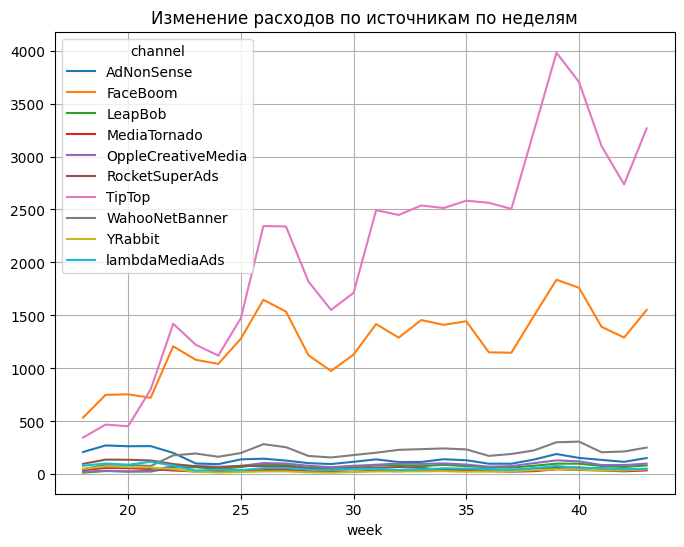

In [42]:
costs_week.plot(figsize=(8,6), grid=True, title='Изменение расходов по источникам по неделям')

<Axes: title={'center': 'Изменение расходов по источникам по месяцам'}, xlabel='month'>

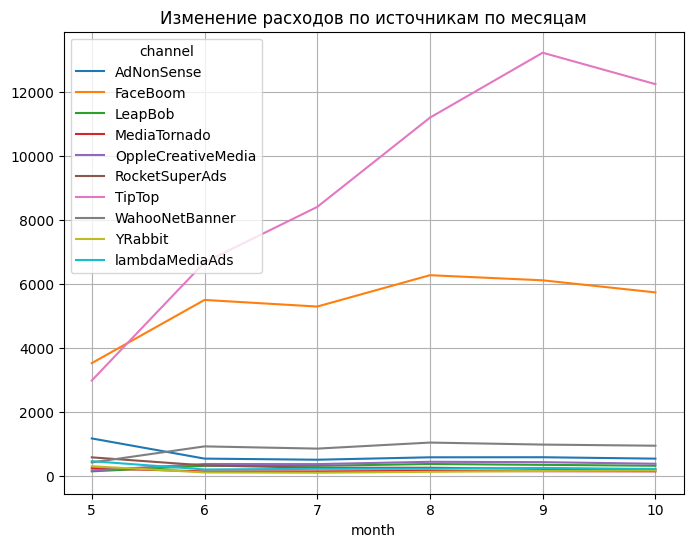

In [43]:
costs_month.plot(figsize=(8,6), grid=True, title='Изменение расходов по источникам по месяцам')

#### Расчет CAC

**Средний CAC на одного пользователя для всего проекта**

In [44]:
profiles['user_id'].nunique()

150008

In [45]:
profiles['acquisition_cost'].sum()

105497.29999999999

In [46]:
average_cac_project = (profiles['acquisition_cost'].sum())/(profiles['user_id'].nunique())
average_cac_project

0.7032778251826568

**Средний CAC одного пользователя для каждого источника трафика**

In [47]:
average_cac = (profiles.groupby(by = 'channel').agg({'user_id':'nunique',
                                      'acquisition_cost':'sum'}))
average_cac             

,user_id,acquisition_cost
channel,,
AdNonSense,3880,3911.25
FaceBoom,29144,32445.60
LeapBob,8553,1797.60
MediaTornado,4364,954.48
OppleCreativeMedia,8605,2151.25
RocketSuperAds,4448,1833.00
TipTop,19561,54751.30
WahooNetBanner,8553,5151.00
YRabbit,4312,944.22


In [48]:
average_cac['average_cac_channel']=(average_cac['acquisition_cost']/average_cac['user_id']).round(2)
average_cac.sort_values(by = 'average_cac_channel', ascending  =False)

,user_id,acquisition_cost,average_cac_channel
channel,,,
TipTop,19561,54751.30,2.80
FaceBoom,29144,32445.60,1.11
AdNonSense,3880,3911.25,1.01
lambdaMediaAds,2149,1557.60,0.72
WahooNetBanner,8553,5151.00,0.60
RocketSuperAds,4448,1833.00,0.41
OppleCreativeMedia,8605,2151.25,0.25
MediaTornado,4364,954.48,0.22
YRabbit,4312,944.22,0.22


**ВЫВОД**

Общая сумма расходов на маркетинг составила 105 497.30

Больше всего денег было потрачано на TipTop = 54 571, это 52% бюджета, FaceBoom = 32 445 - 31%. Остальные 17% бюджета распередены между оставшимися 10 источниками более-менее равномерно.

Графики распределения расходов в динамике показывают, что:
- за полгода 8 маленьких каналов привлечения использовались равномерно. Не было значительных скачков в росте или падении бюджета. Небольшой подъем наблюдается в районе 40й неделе при анализе по неделям. При анализе по месяцам, это движение сглажено
- FaceBoom и TipTop находятся на графике значительно выше остальных каналов и расходы растут с течением времени
- неизвестно, как долго источники использовались к моменту анализа. В наших данных с FaceBoom и TipTop уже получают больше денег, чем остальные каналы, но по ним виден стремительный рост. Возможно, в какой-то момент они показали хорошее ROI и в них стали "вливать" больше денег. 

Средний САС на одного пользователя по всем каналам за полгода составил 0.7. Если рассматривать каналы по отдельности видно, что:
- TipTop лидирует, средняя стоимоть клиента =2.8
- AdNonSense (1.01) не сильно отстает по среднему расходу от FaceBoom(1.11). Из предыдущих расчетов знаем, что AdNonSense привлек в 13 раз меньше пользователей, чем FaceBoom и ушел в небольшой минус. Вероятно, маркетологи вовремя остановились и перестали тратить много денег на канал, который не приносит значительный доход.

### Оценка окупаемости рекламы

In [49]:
horizon_days = 14
observation_date = datetime(2019, 11, 1).date()

#### Конверсия, динамика изменений

In [50]:
raw_result_con,  result_group, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                               dimensions=[], calculat_horizon = True)

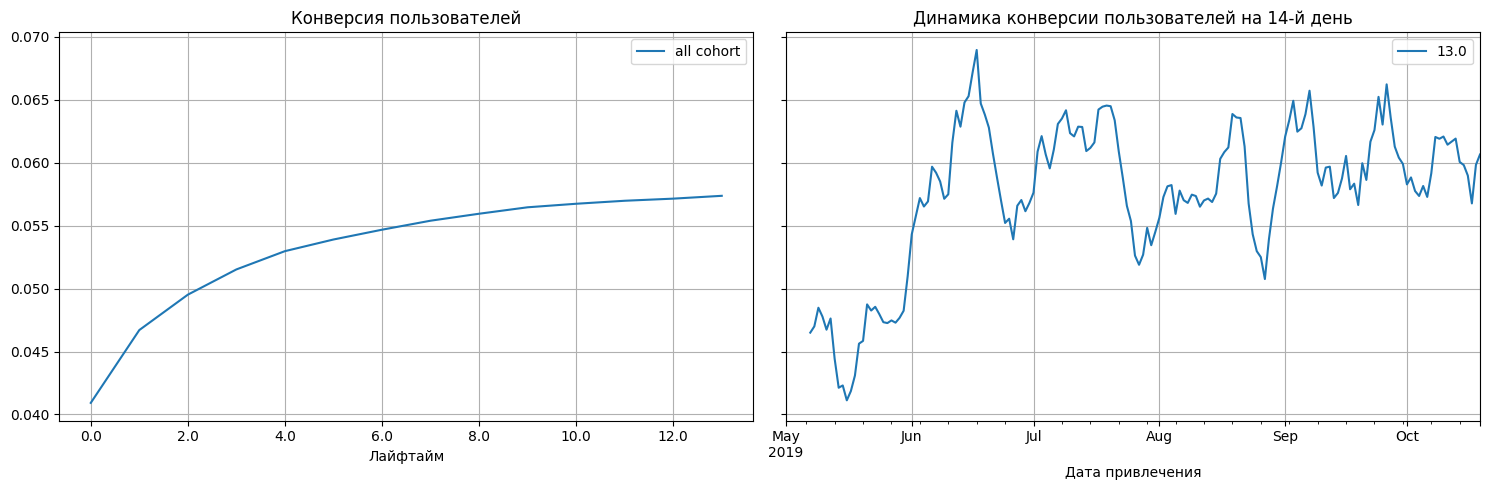

In [51]:
plot_conversion(result_group, result_in_time, horizon_days, window=7)

**Конверсия с разбивкой по регионам**

In [52]:
raw_result_con,  result_group, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                               dimensions=['region'], calculat_horizon = True)

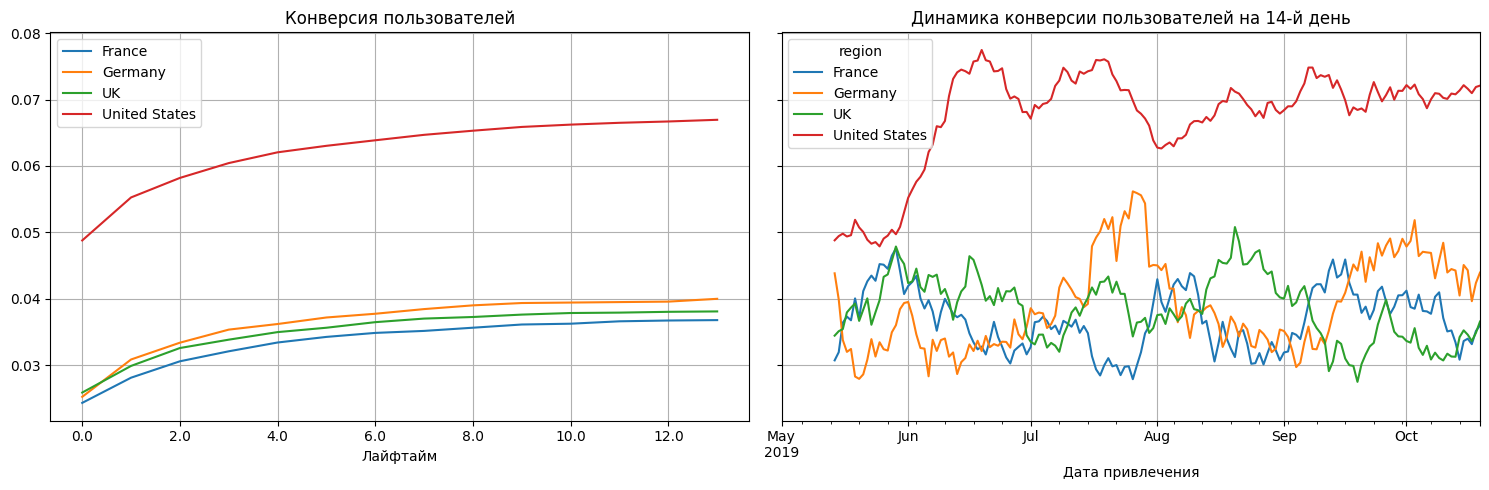

In [53]:
plot_conversion(result_group, result_in_time, horizon_days, window=14)

**Конверсия с разбивкой по устройствам**

In [54]:
raw_result_con,  result_group, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                               dimensions=['device'], calculat_horizon = True)

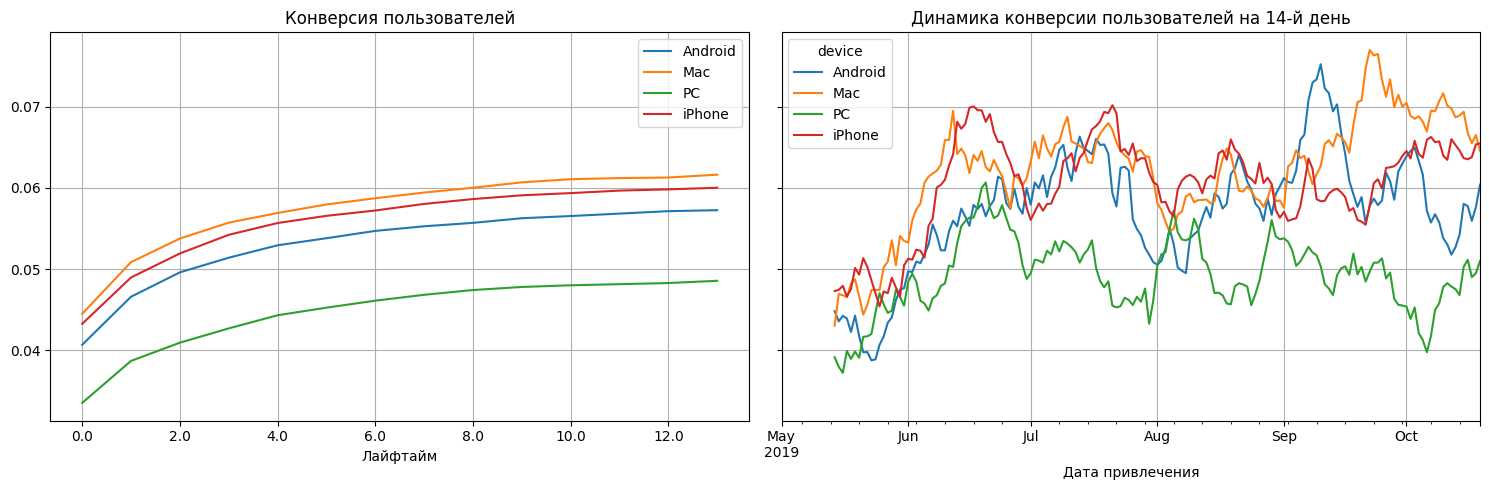

In [55]:
plot_conversion(result_group, result_in_time, horizon_days, window=14)

**Конверсия с разбивкой по источникам привлечения**


In [56]:
raw_result_con,  result_group, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days,
                                                               dimensions=['channel'], calculat_horizon = True)

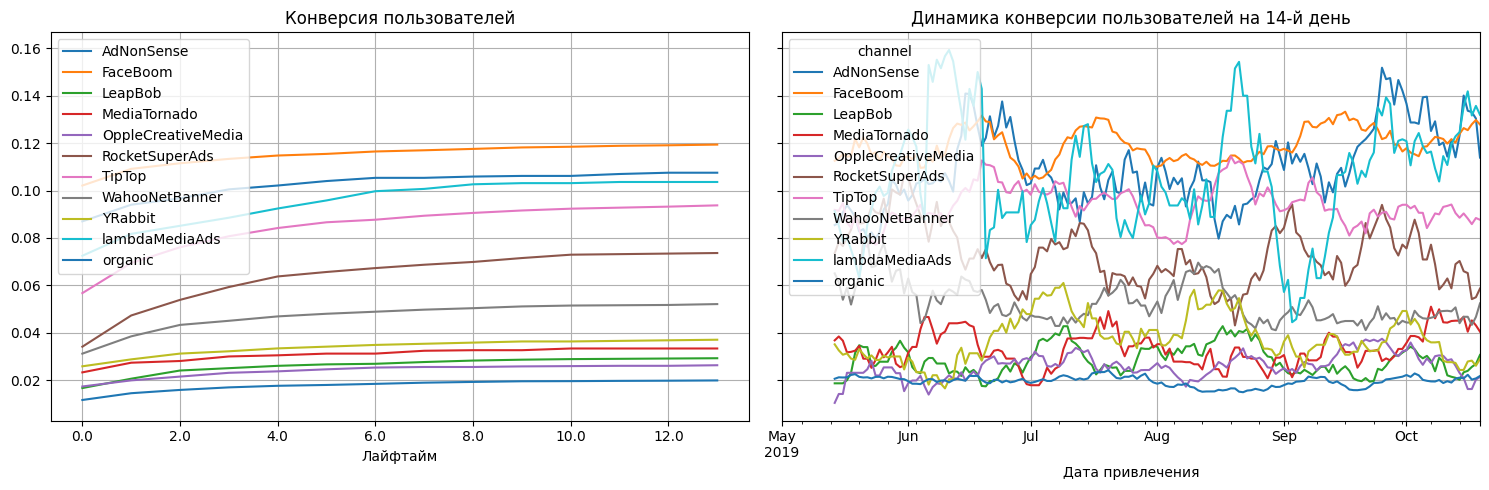

In [57]:
plot_conversion(result_group, result_in_time, horizon_days, window=14)

**ВЫВОД**

Показатель конверсии растет с течением времени и достигает показателя показателя около 0.57  к 14 дню жизни. Если рассматривать конверсию в динамике, то пользователи привлеченные в середине июня, показывают конверсию около 0.7 на 14 день жизни. Меньше всего этот показатель в середине мая. В целом конверсия ведет себя по правилам и со временем постепенно растет, при этом не достигая единицы. 

#### Удержание, динамика изменений

In [58]:
raw_result, result_grouped, result_in_time  = get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], calculat_horizon = True)

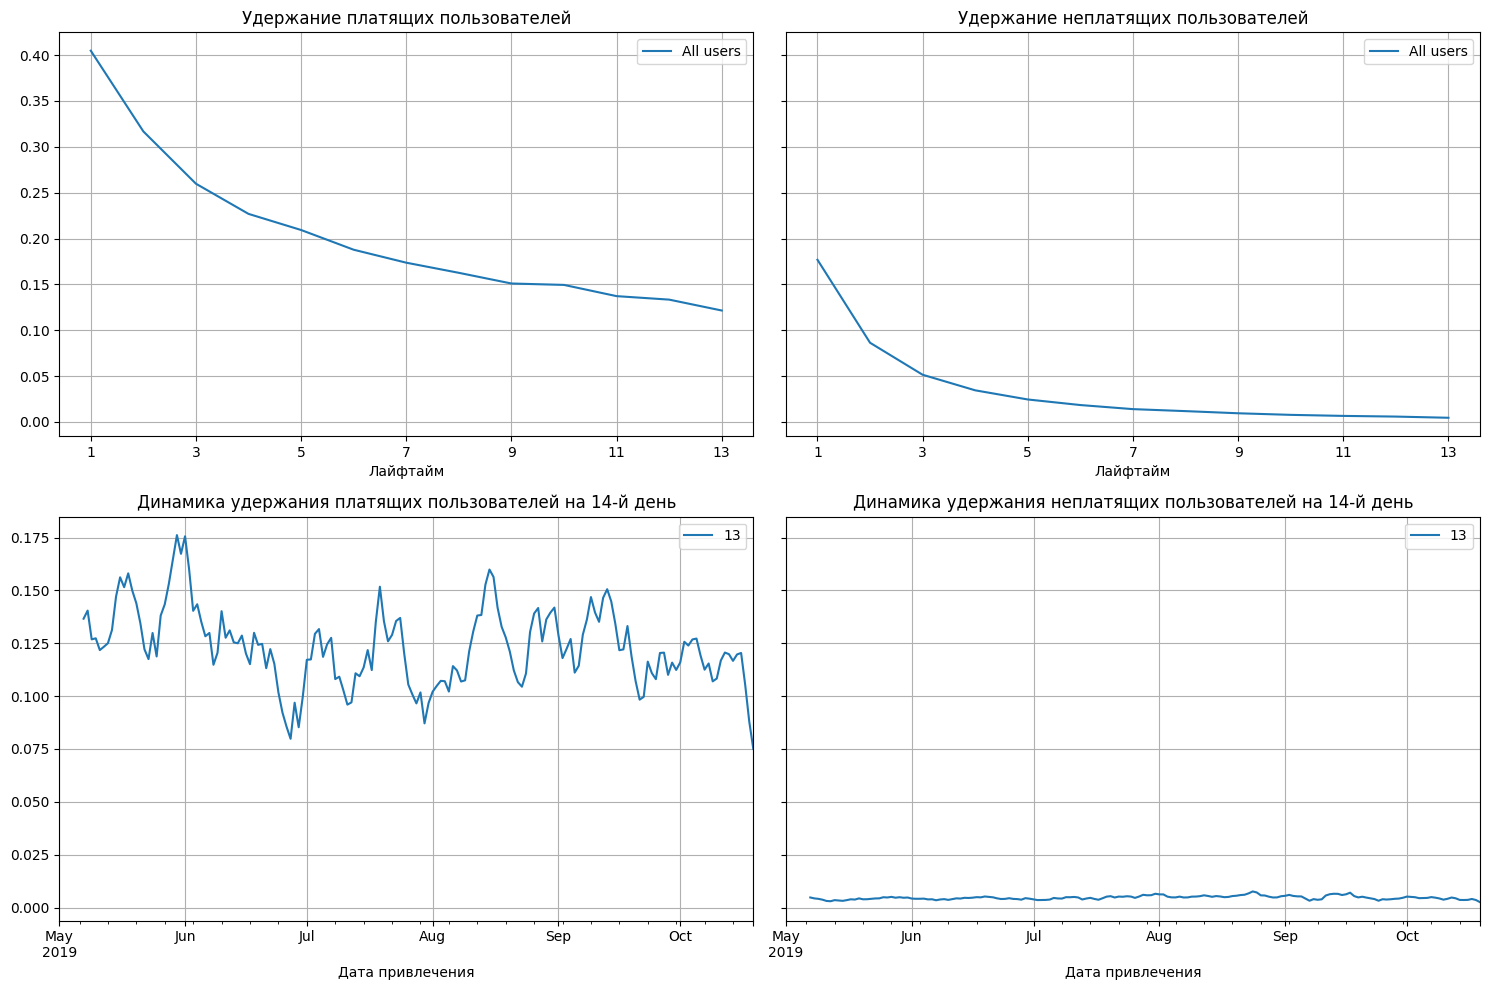

In [59]:
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

**Удержание с разбивкой по регионам**

In [60]:
raw_result, result_grouped, result_in_time  = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'], calculat_horizon = True)

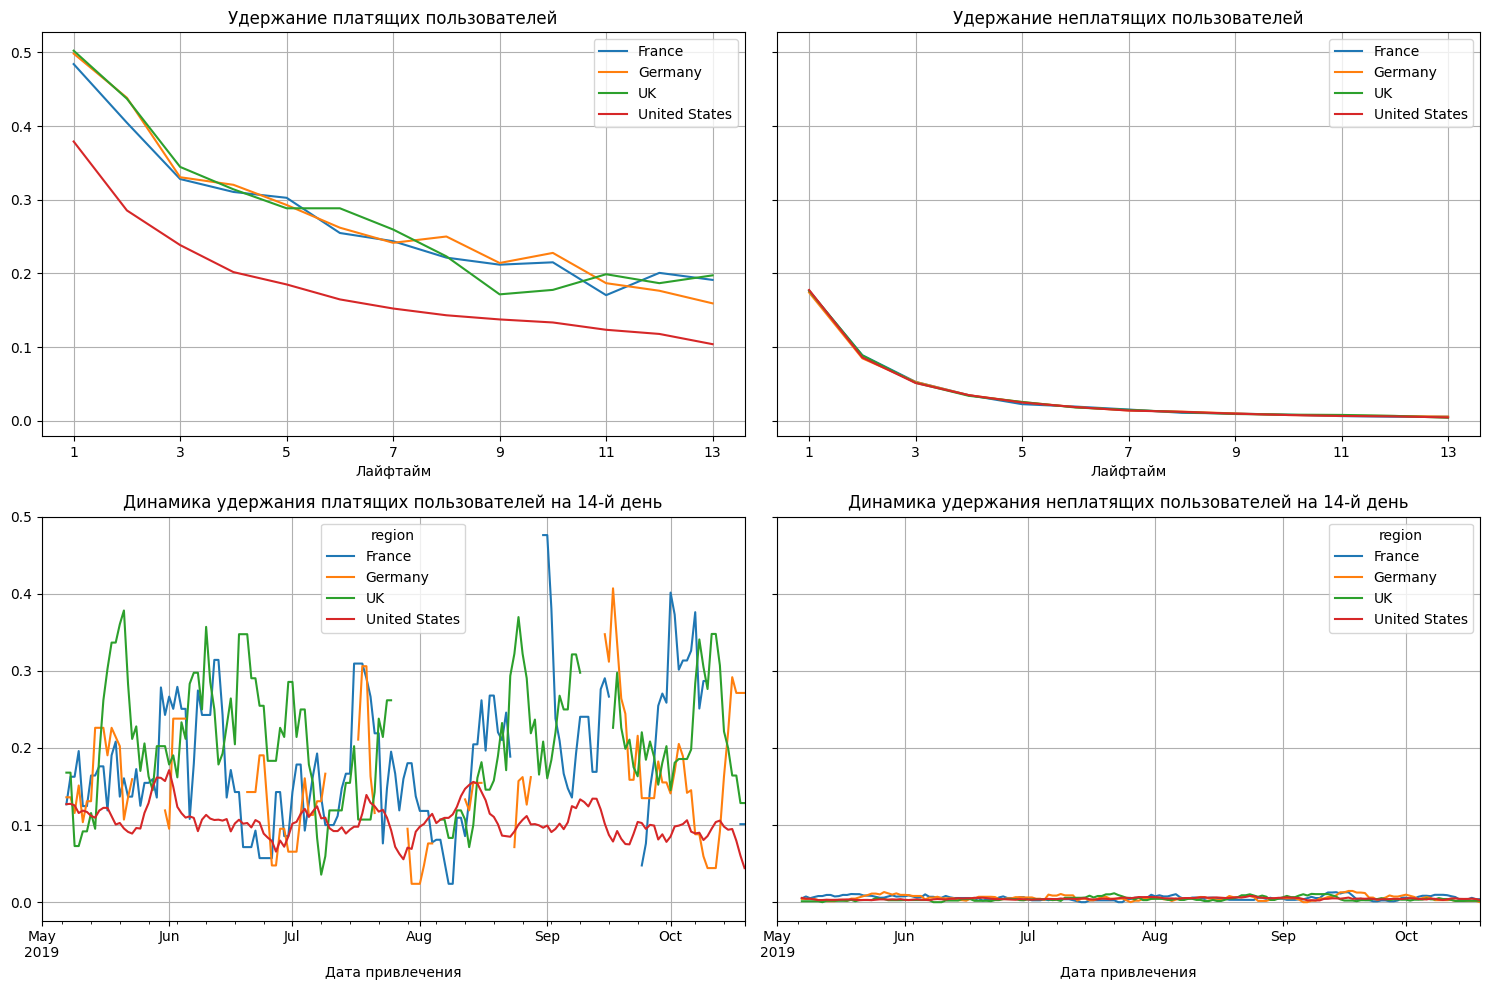

In [61]:
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

**Удержание с разбивкой по устройствам**

In [62]:
raw_result, result_grouped, result_in_time  = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'], calculat_horizon = True)

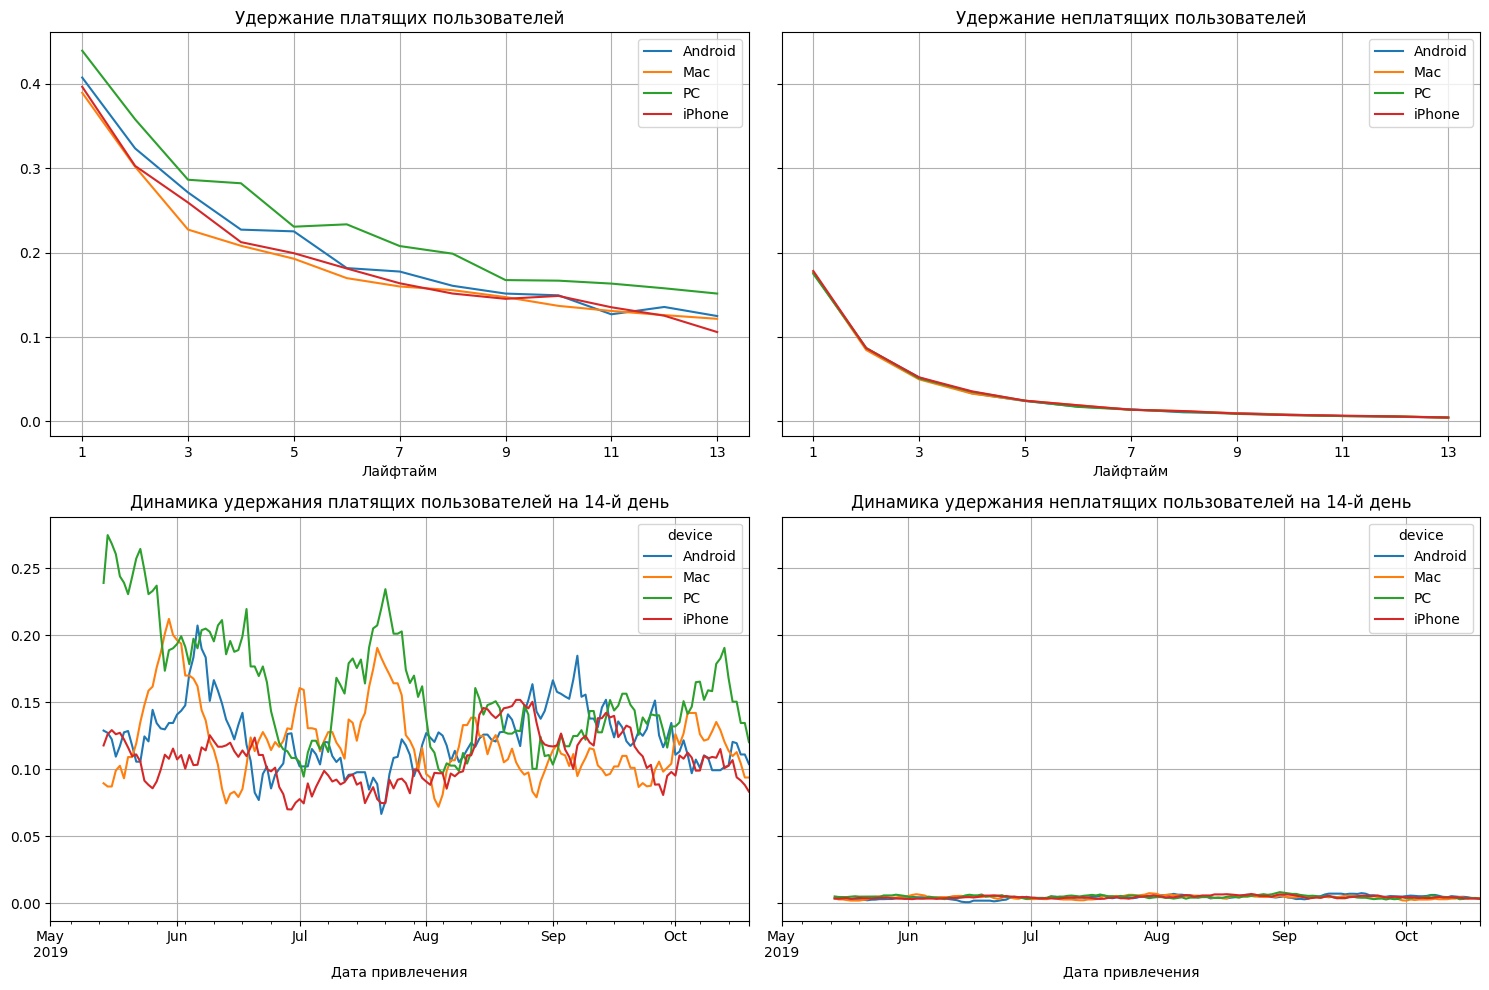

In [63]:
plot_retention(result_grouped, result_in_time, horizon_days, window=14)

**Удержание с разбивкой по каналам привлечения**

In [64]:
raw_result, result_grouped, result_in_time  = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'], calculat_horizon = True)

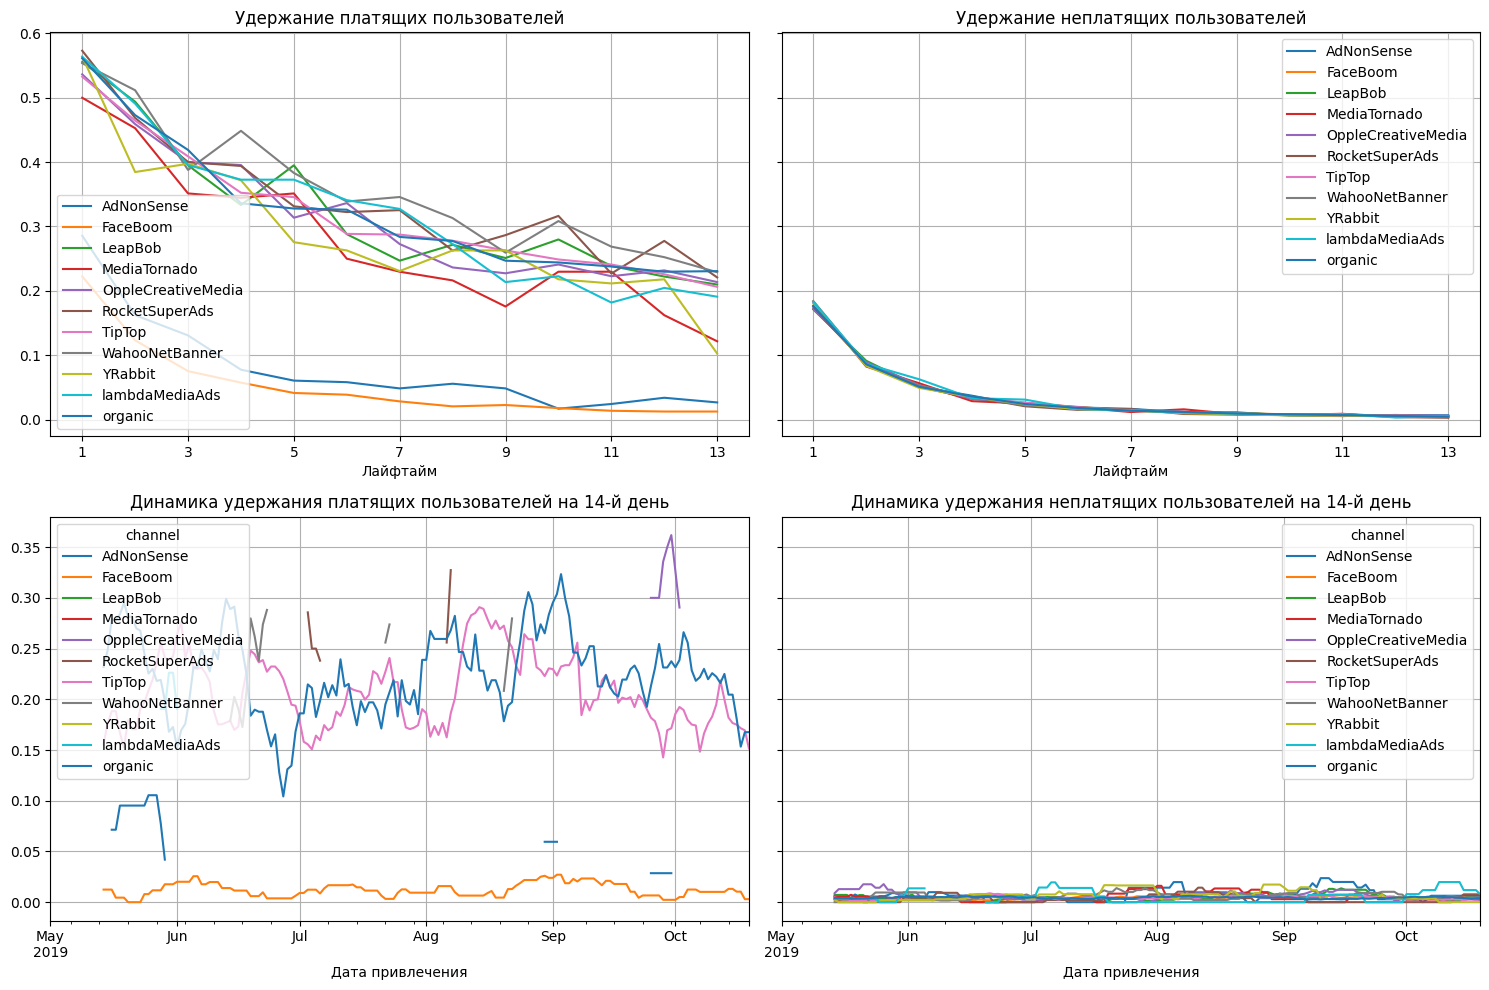

In [65]:
plot_retention(result_grouped, result_in_time, horizon_days, window=14)

**ВЫВОД**

Удержание пользователей ведет себя по правилам и со временем снижается. Удержание платящих  пользователей выше, чем неплатящах.

Есть ощущение, что к 14 дню жизни неплатящие пользователи решают нужно им пользоваться этим приложением в дальнейшем или нет. Возможно, заканчивается бесплатный пробный период, после которого уменьшается объем функционала и приложение перестает быть интересным. 
Удержание неплатящих пользователей на 14 лайфтайм колеблется в районе нуля. В то время, как платящие пользователи на этом этапе показывают удержание от 0.075 до 0.175

#### Окупаемость рекламы  

In [66]:
profiles = profiles.drop(columns=['revenue'])
#удалила это столбец, т к из-за него ломалась функция get_ltv()

In [67]:
profiles 

,user_id,region,device,channel,first_ts,dt,month,payer,acquisition_cost
0,599326,United States,Mac,FaceBoom,2019-05-07 20:58:57,2019-05-07,2019-05-01,True,1.088172
1,4919697,United States,iPhone,FaceBoom,2019-07-09 12:46:07,2019-07-09,2019-07-01,False,1.107237
2,6085896,France,iPhone,organic,2019-10-01 09:58:33,2019-10-01,2019-10-01,False,0.000000
3,22593348,Germany,PC,AdNonSense,2019-08-22 21:35:48,2019-08-22,2019-08-01,False,0.988235
4,31989216,United States,iPhone,YRabbit,2019-10-02 00:07:44,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,United States,iPhone,TipTop,2019-09-28 08:33:02,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,UK,PC,organic,2019-10-21 00:35:17,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,United States,iPhone,TipTop,2019-07-23 02:57:06,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,United States,PC,MediaTornado,2019-09-28 21:28:09,2019-09-28,2019-09-01,False,0.205714


In [68]:
profiles = profiles[profiles.channel != 'organic' ]

In [69]:
profiles

,user_id,region,device,channel,first_ts,dt,month,payer,acquisition_cost
0,599326,United States,Mac,FaceBoom,2019-05-07 20:58:57,2019-05-07,2019-05-01,True,1.088172
1,4919697,United States,iPhone,FaceBoom,2019-07-09 12:46:07,2019-07-09,2019-07-01,False,1.107237
3,22593348,Germany,PC,AdNonSense,2019-08-22 21:35:48,2019-08-22,2019-08-01,False,0.988235
4,31989216,United States,iPhone,YRabbit,2019-10-02 00:07:44,2019-10-02,2019-10-01,False,0.230769
7,46006712,France,Android,AdNonSense,2019-06-30 03:46:29,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,United States,iPhone,TipTop,2019-05-24 21:03:26,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,United States,Mac,FaceBoom,2019-08-12 06:47:27,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,United States,iPhone,TipTop,2019-09-28 08:33:02,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,United States,iPhone,TipTop,2019-07-23 02:57:06,2019-07-23,2019-07-01,False,2.600000


In [70]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], calculat_horizon=False)

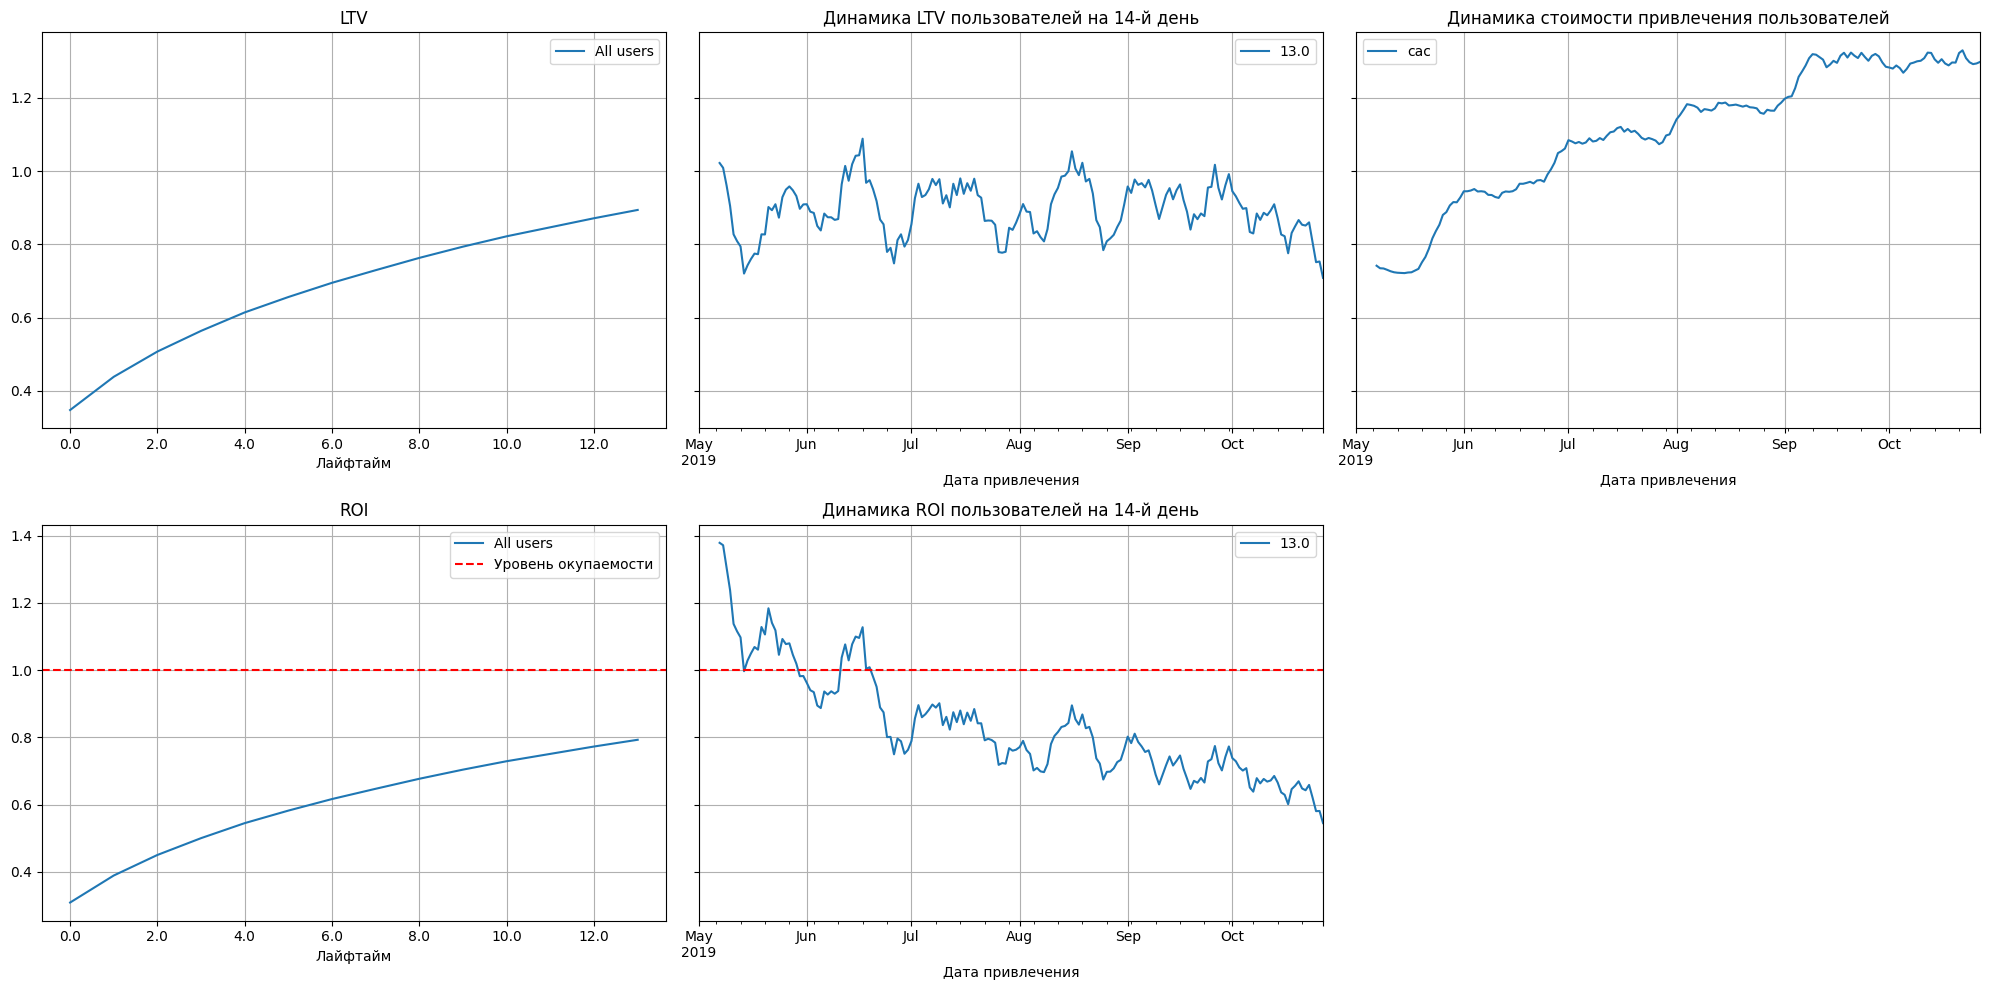

In [71]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

**ВЫВОД**

ROI по всем пользователям не достигает уровня окупаемости к 14 дню жизни. 

LTV со временем растет, как и должно быть. В целом на 14-й день в разные месяцы LTV колеблется, падая в середине мая и выростая в середине июня. 

Расходы на привлечение стремительно растут. Этот график похож на график по каналу канал TipTop, который забирает на себя 50% бюджета и будет доминировать во всех графиках. Интересно, что в мае на 14 день окупаемость инвестиций была в районе 1.4, но начала снижаться вместе с ростом расходов на привлечение. Возможно, ошибка маркетологов в том, что они привлекали много пользователей. Но эти пользователи были не готовы надолго оставаться в приложении и тратить деньги. 


#### Окупаемость с разбивкой по регионам

In [72]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions
                                                      =['region'], calculat_horizon=False)

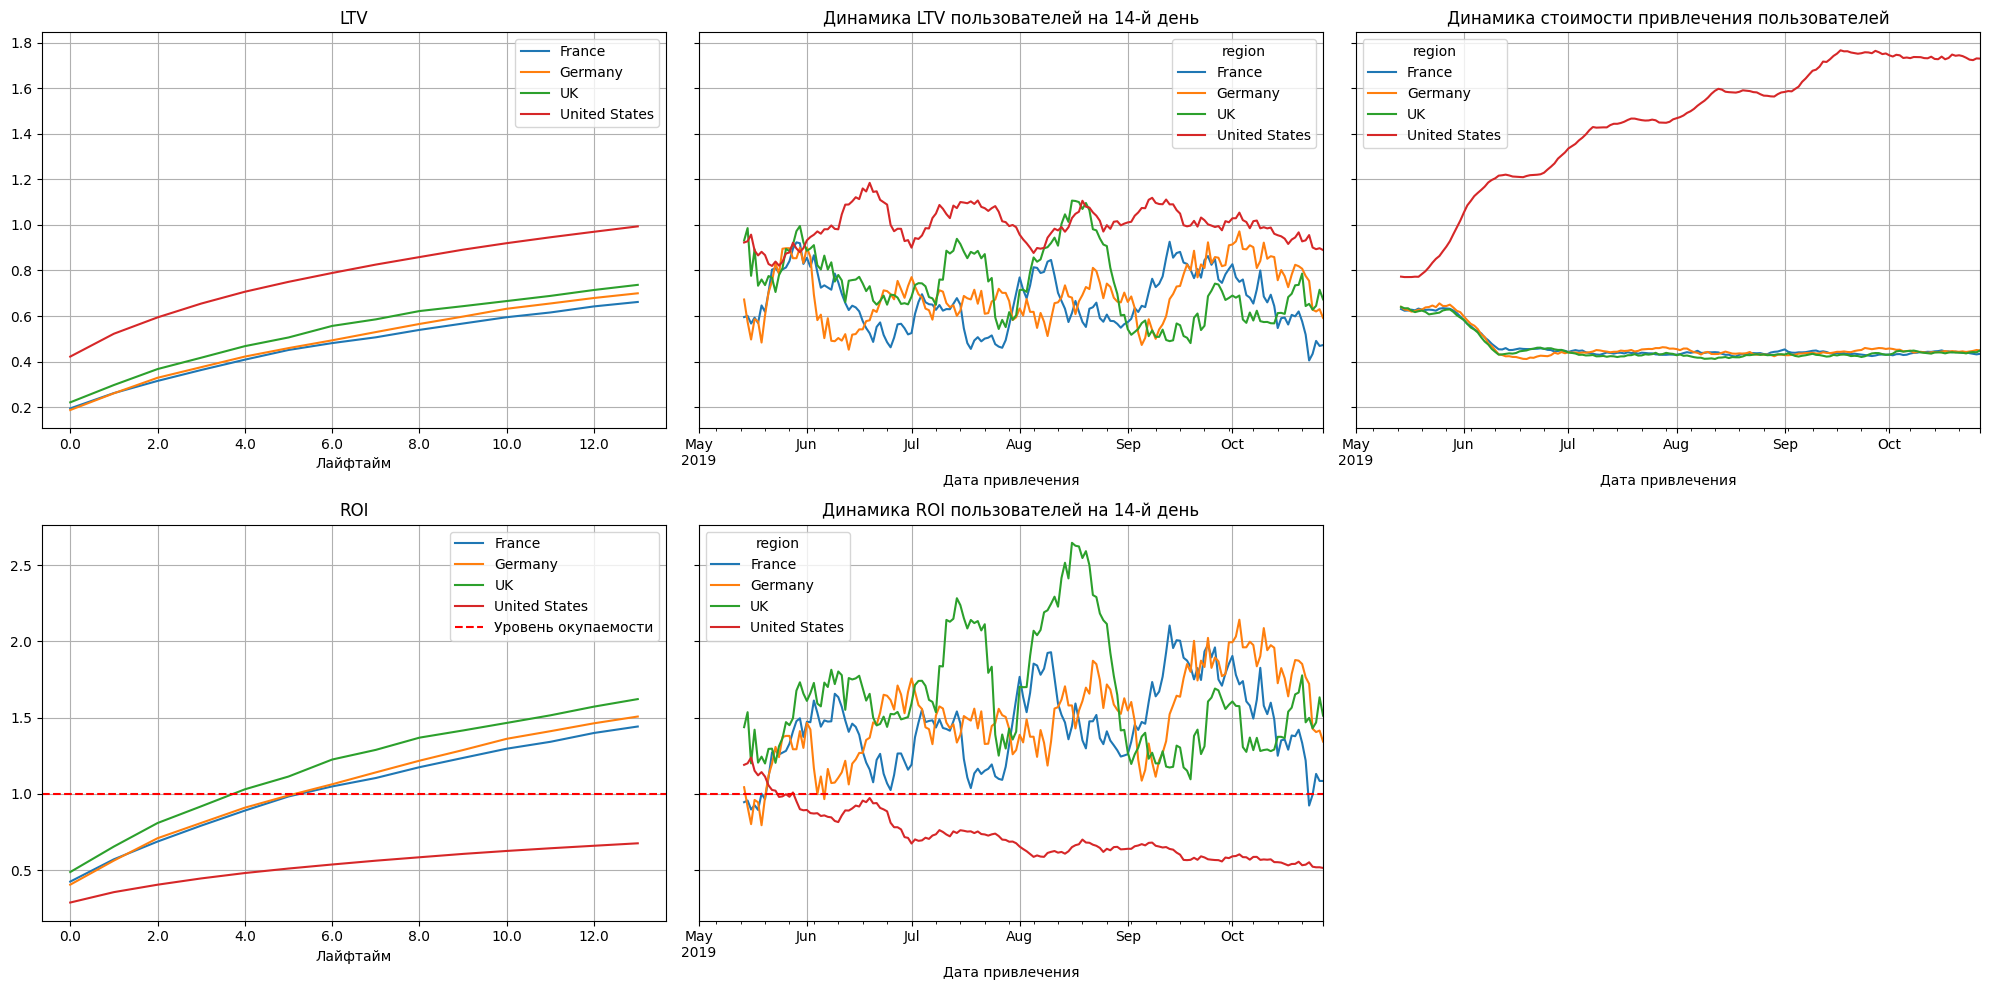

In [73]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

**ВЫВОД**

Как и следовало предположить больше всего дохода приносят жители США, но меньше, чем стоит их привлечение. В итоге ROI по США не достигает уровня окупаемости к 14 дню. Но так было не всегда, еще в мае этот показатель был в районе 1.2. Но начиная с конца мая ROI по США к 14-му дню так и не доходит единицы.

Остальные три страны находятся примерно на одном уровне. Выделяется Великобритания с пиком в августе. Все три страны начинают окупаться уже в районе 4-го лайфтайма и а на 14 день всегда в плюсе.

Большое количество пользователей из США тянет общий показатель окупаемости вниз.

#### Окупаемость с разбивкой по устройствам

In [74]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions
                                                      =['device'], calculat_horizon=False)

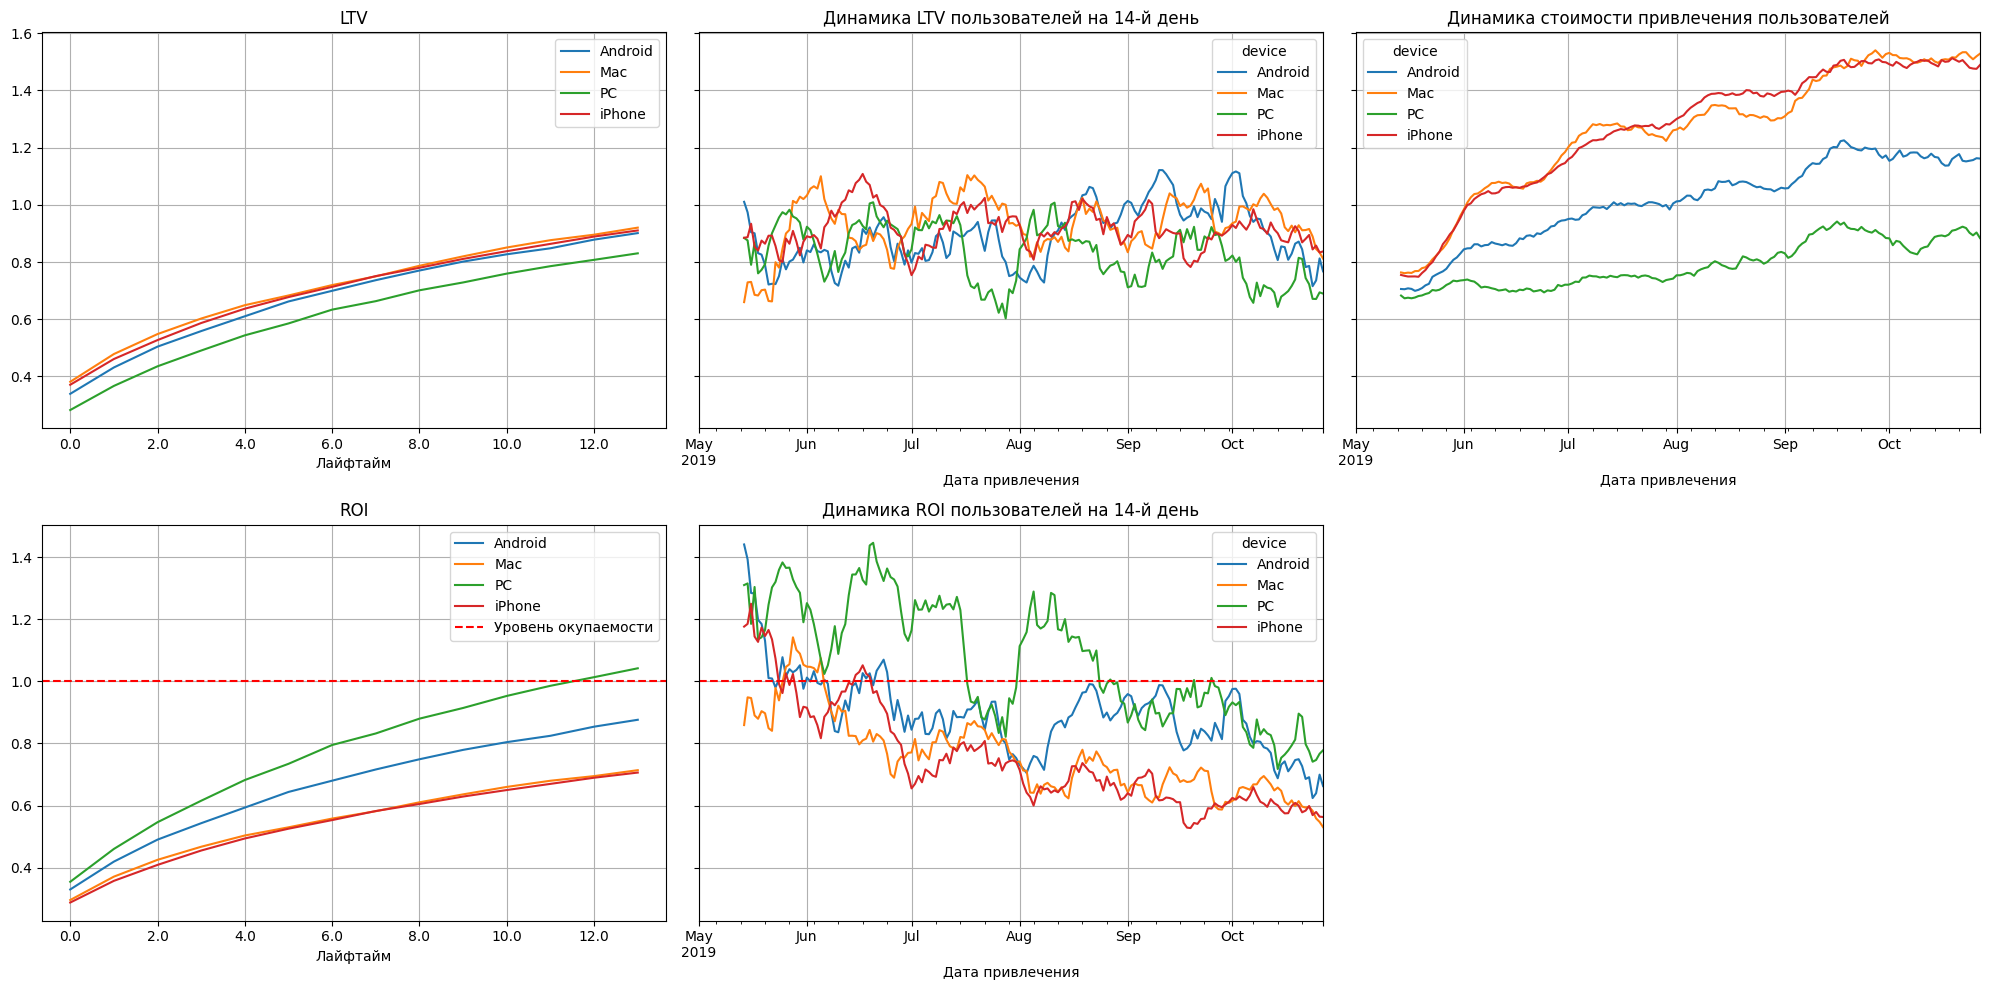

In [75]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=14)

**ВЫВОД**

Интересно, что все 4 устройства приносят примерно одинаковый LTV на 14й день. 

При этом расходы на привлечение пользователей MAC и iPhone выше и как следствие окупаемость по ним ниже. Даже не достигает уровня окупаемости к 14му дню. В целом  уровня окупаемости достигают только пользователи PC  к 11 дню.

В динамике лучшие показатели ROI  у пользователей PC, но они, начиная с сентября уходят в минус.

Логично предположить, что пользователи устройств фирмы Apple в большинстве находятся в США, которые тянут общие показатели вниз.

#### Окупаемость по источним привлечения

In [76]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'], calculat_horizon=False)

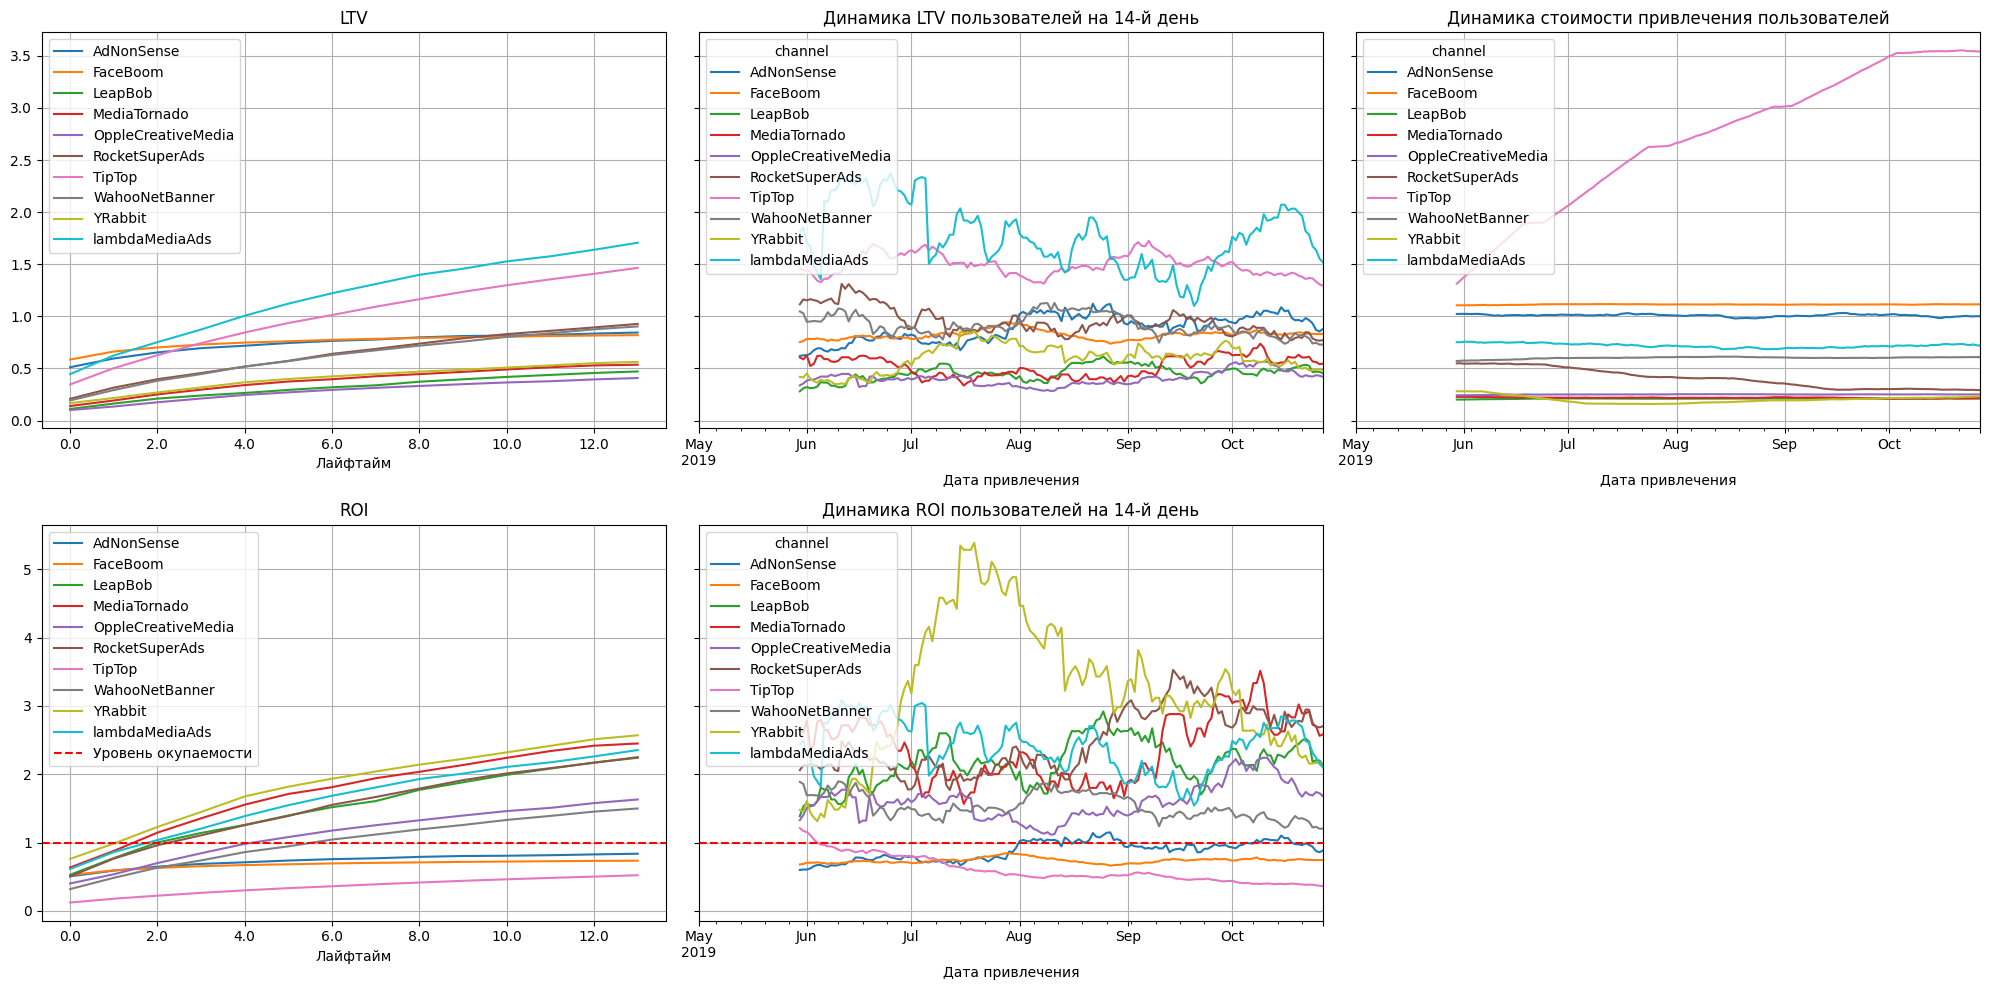

In [77]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=30)

**ВЫВОД**

Есть 7 каналов привлечения, затраты на которые окупаются уже на 1-6 дней. 

Так и не достигают окупаемости к 14 дню: 

- AdNonSense
- TipTop
- FaceBoom

В расчет окупаемости не попадает органический трафик, т к на него нет очевидных расходов и не на что делить LTV при расчете. 

Если смотреть в динамике, то AdNonSense начинает колебаться вдоль уровня окупаемости с августа. Иногда переходит в плюс. 

Грубый подсчет прибыли в разделе  "Доля платящих пользователей по каналам привлечения" подтвердился только частично. В том расчете TipTop показывал прибыль, на графике же видно, что данный канал не достигает уровня окупаемости к 14 дню жизни. Возможно, пользователям в TipTop нужно больше, чем 2 недели, чтобы сделать достаточно покупок.  

**Пора проверить предположение, что пользователи неприбыльных каналов TipTop и FaceBoom находятся в США. Построим сводную таблицу:**

In [78]:
profiles.head(1)

,user_id,region,device,channel,first_ts,dt,month,payer,acquisition_cost
0,599326,United States,Mac,FaceBoom,2019-05-07 20:58:57,2019-05-07,2019-05-01,True,1.088172


In [79]:
profiles.pivot_table(index = 'channel',
                     columns = 'region',
                     values = 'user_id',
                     aggfunc = 'nunique').fillna(0)

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0
FaceBoom,0.0,0.0,0.0,29144.0
LeapBob,2988.0,2519.0,3046.0,0.0
MediaTornado,0.0,0.0,0.0,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
RocketSuperAds,0.0,0.0,0.0,4448.0
TipTop,0.0,0.0,0.0,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,0.0
YRabbit,0.0,0.0,0.0,4312.0


Предположение, что каналы TipTop и FaceBoom работают с США было верным. 
Кроме них также относятся только  к США:
- MediaTornado
- RocketSuperAds
- YRabbit

Любопытно, что пользователей пришедших с органического трафика в США больше в 2 раза, чем в остальных трех странах вместе взятых. Это напоминает, что привлекать пользователей из США по прежнему перспективно. Но, возможно, нужно рассмотреть другие каналы или перевести бюджет на MediaTornado, RocketSuperAds, YRabbit, которые показали хороший ROI. В динамике самые высокие показатели на 14-й день у YRabbit.

### Выводы


#### Сводная информация по проекту

**Прежде чем, делать рекоменадции вспомним всё, что узнали в процессе анализа:**

В нашем распоряжении выгрузка о посещениях приложения Procrastinate Pro+ с 01.05.2019 по 31.10.2019

Приложением пользуются жители 4-х стран: 
- США -  67% 
- Великобритании - 12%
- Франции - 11%
- Германии - 10%

Пользователи применяют 4 устройства:
- iPhone - 36%
- Android - 23%
- PC  -20%
- Mac - 20%

Для привлечения используется 11 источников, один из которых organic - бесплатный:

- organic - 35%
- TipTop - 18%
- FaceBoom - 16%
- WahooNetBanner - 7%
- LeapBob - 5%
- OppleCreativeMedia - 5%
- RocketSuperAds - 4%
- YRabbit - 3%
- MediaTornado - 3%
- AdNonSense - 2%
- lambdaMediaAds - 2%

В приложении установленные фиксированные цены покупок:
- 4.99
- 5.99
- 9.99
- 19.99
- 49.99
Вероятно, это стоимость подписок за определенный функционал и период. Самый популярный вариант, он же самый дешевый - 4.99 - было совершено 96% покупок. 

Данные о расходах на рекламу представлены за период с 01.05.2019 по 27.10.2019, ровно 180 дней. 
Минимальный платеж в день составил 0.8, максимальный = 630
Больше всего бюджета было потрачено на источник TipTop, меньше всего на YRabbit.В данных нет информации о канале organic, т к он по определению бесплатный

Составили профили пользователей. Они включат данные о регионе и используемых устройствах, канале привлечения, дате первого посещения в разных форматах, была ли совершена хотя бы одна покупка и сколько стоило привлечение каждого клиента. Всего 150 008 записей. 

Доля платящих пользователей составляет:
- США - 7%
- Германия - 4%
- Великобритания - 4%
- Франция - 4%

В США примерно в 5,6-6,7 раз больше пользователей, чем в каждой другой стране. При этом платящих пользователей в США только 1,75 раз больше.

Доля платящих пользователей практически одинаково распеределена по устройствам. На PC меньше на 1%, чем на других устройствах. Похоже, устройство не сильно влияет на принятие решений о покупке и на всех устройствах приложение работает одинаково. 

Доля платящих пользователей выше всего от источника Faceboom - 12%. Больше всего денег приносит органический трафик, на который нет расходов.

Общая сумма расходов на маркетинг составила 105 497.30 за полгода.

Больше всего денег было потрачано на TipTop = 54 571, это 52% бюджета, FaceBoom = 32 445 - 31%. Остальные 17% бюджета распередены между оставшимися 10 источниками более-менее равномерно.

Графики распределения расходов в динамике показывают, что:
- за полгода 8 маленьких каналов привлечения использовались равномерно. Не было значительных скачков в росте или падении бюджета. Небольшой подъем наблюдается в районе 40й неделе при анализе по неделям. При анализе по месяцам, это движение сглажено
- FaceBoom и TipTop находятся на графике значительно выше остальных каналов и расходы растут с течением времени

Средний САС на одного пользователя по всем каналам за полгода составил 0.7. Если рассматриватьк каналы по отдельности видно, что:
- TipTop лидирует, средняя стоимоть клиента =2.8
- AdNonSense (1.01) не сильно отстает по среднему расходу от FaceBoom(1.11).

Показатель конверсии растет с течением времени и достигает показателя около 0.57  к 14 дню жизни. Если рассматривать конверсию в динамике, то пользователи привлеченные в середине июня, показывают конверсию около 0.7 на 14 день жизни. Меньше всего этот показатель в середине мая. В целом конверсия ведет себя по правилам и со временем постепенно растет, не достигая единиы. 

Удержание пользователей ведет себя по правилам и со временем снижается. Удержание платящих пользователей выше, чем неплатящах.

Есть ощущение, что к 14 дню жизни неплатящие пользователи решают нужно им пользоваться этим приложением в дальнейшем или нет. Возможно, заканчивается бесплатный пробный период, после которого уменьшается объем функционала и приложение перестает быть интересным. 
Удержание неплатящих пользователей на 14 лайфтайм колеблется в районе нуля. В то время, как платящие пользователи на этом этапе показывают удержание от 0.075 до 0.175

ROI по всем пользователям не достигает уровня окупаемости к 14 дню жизни. 
LTV со временем растет, как и должно быть. В целом на 14-й день в разные месяцы LTV колеблется, падая в середине мая и выростая в середине июня. 
Расходы на привлечение стремительно растут. Этот график похож на график по каналу канал TipTop, который забирает на себя 50% бюджета и будет доминировать во всех графиках. Интересно, что в мае на 14 день окупаемость инвестиций была в районе 1.2, но начала снижаться вместе с ростом расходов на привлечение. 

Больше всего дохода приносят жители США, но меньше, чем стоит их привлечение. В итоге ROI по США не достигает уровня окупаемости к 14 дню.
Остальные три страны находятся примерно на одном уровне. Они начинают окупаться уже в районе 4-го дня лайфтайма и на 14 день всегда в плюсе.
Большое количество пользователей из США тянет общий показатель окупаемости вниз.

Все 4 устройства приносят примерно одинаковый LTV на 14й день. При этом расходы на привлечение пользователей MAC и iPhone выше и как следствие окупаемость по ним ниже. Даже не достигает уровня окупаемости к 14му дню. В целом  уровня окупаемости достигают только пользователи PC  к 11 дню. В динамике лучшие показатели ROI  у пользователей PC, но они, начиная с сентября уходят в минус.
Логично предположить, что пользователи устройств фирмы Apple в большинстве находятся в США, которые тянут общие показатели вниз.

Есть 7 каналов привлечения, затраты на которые окупаются уже на 1-6 дней. 
Так и не достигают окупаемости к 14 дню: 
- AdNonSense
- TipTop
- FaceBoom
В расчет окупаемости не попадает органический трафик, т к на него нет очевидных расходов и не на что делить LTV при расчете. 
Если смотреть в динамике, то AdNonSense начинает колебаться вдоль уровня окупаемости с августа. Иногда переходит в плюс. 

#### Рекомендации отделу маркетинга

Рекомендация отделу маркетинга:

- Сделать акцент на работе с пользователями из США, но изменить стратегию. Пользователи привлеченные через канал FaceBoom и TipTop не достигают уровня окупаемости к 14 дню жизни. Стоит рассмотреть перераспределение бюджета на канал YRabbit, который показывает высокий ROI в этой стране. 

- Следует проанализировать канал AdNonSense, привлекающий пользователей из Европы. ROI не всегда достигает уровня окупаемости к 14-му дню. Также стоит присмотреться к каналу lambdaMediaAds по Европе, который показывал высокий ROI  в летние месяцы и может приносить больше прибыли при увеличении бюджета.